In [30]:
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'
import cv2
import numpy as np
from matplotlib import pyplot as plt
import  os


In [33]:
def ocr_core(filename):  
  
    text = pytesseract.image_to_string(Image.open(filename))  # We'll use Pillow's Image class to open the image and pytesseract to detect the string in the image
    return text

print(ocr_core('image_new.jpeg')) 

ABSTRACT

In this paper, we propose a word spotting based information retrieval approach for medical pre-
scriptions/reports written by doctors. Sometimes due to almost illegible handwriting, it is difﬁcult
to understand the medication reports of doctors. This often confuses the patients about the actual
medicine/disease names written by doctors and as a consequence they suffer. A medical prescription
is generally partitioned into two parts, a printed letterhead part containing the doctor's name, designa-
tion, organization name, etc. and a handwritten part where the doctor writes patient's name and report
his/her ﬁndings and suggests medicine names. There are many signiﬁcance impacts of the proposed work.
For example, such work can be used (i) to develop expert diagnostic systems (ii) to extract information
from patient history that can be obtained by this proposed method (iii) to detect wrong medication (iv)
to make different statistical analysis of the medicines prescribed by the do

In [30]:
img = cv2.imread('image.jpeg',0)
img = cv2.medianBlur(img,5)

In [31]:
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

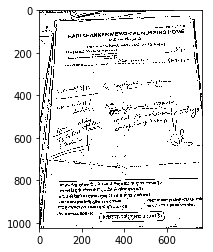

In [32]:
#plt.plot(2,2,1)
plt.imshow(th3,'gray')
plt.show()

In [8]:
def get_string(img_path):
    img = cv2.imread(img_path)
    file_name = os.path.basename(img_path).split('.')[0]
    file_name = file_name.split()[0]

    output_path = os.path.join(output_dir, file_name)
    print(output_path)
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Crop the areas where provision number is more likely present
    img = crop_image(img, pnr_area[0], pnr_area[1], pnr_area[2], pnr_area[3])
    # img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)

    # Convert to gray
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply dilation and erosion to remove some noise
    kernel = np.ones((1, 1), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.erode(img, kernel, iterations=1)

    #  Apply threshold to get image with only black and white
    img = apply_threshold(img, method)
    save_path = os.path.join(output_path, file_name + "_filter_" + str(method) + ".jpg")
    cv2.imwrite(save_path, img)

    # Recognize text with tesseract for python
    result = pytesseract.image_to_string(img, lang="eng")

    return result



In [10]:
result = get_string("C:\\Users\\naman\\Documents\\Project\\image.jpeg")

NameError: name 'output_dir' is not defined

In [24]:
import numpy as np
import os
import cv2
import glob
import shutil
import pytesseract
import re
import time
import argparse
from statistics import mode

regex = r"P\d{17}"
found = {}
results = {}
queue = []
done = []
missing = []
pnr_area = [150, 450, 1600, 1150]  # [start_x, start_y, end_x, end_y]



def apply_threshold(img, argument):
    switcher = {
        1: cv2.adaptiveThreshold(cv2.GaussianBlur(img, (7, 7), 0), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2),
        #2: 
        #3: cv2.adaptiveThreshold(cv2.GaussianBlur(img, (9, 9), 0), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2),
        #4: cv2.adaptiveThreshold(cv2.GaussianBlur(img, (11, 11), 0), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2),
        #5: cv2.adaptiveThreshold(cv2.medianBlur(img, 7), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2),
    }
    return switcher.get(argument, "Invalid method")


def crop_image(img, start_x, start_y, end_x, end_y):
    cropped = img[start_y:end_y, start_x:end_x]
    return cropped


def get_string(img_path, method):
    # Read image using opencv
    img = cv2.imread(img_path)
    file_name = os.path.basename(img_path).split('.')[0]
    file_name = file_name.split()[0]

    output_path = os.path.join(output_dir, file_name)
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Crop the areas where provision number is more likely present
    #img = crop_image(img, pnr_area[0], pnr_area[1], pnr_area[2], pnr_area[3])
    img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    # Convert to gray
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply dilation and erosion to remove some noise
    kernel = np.ones((1, 1), np.uint8)
    #img = cv2.erode(img, kernel, iterations=1)
    img = cv2.dilate(img, np.ones((2, 2), np.uint8), iterations=1)

    #  Apply threshold to get image with only black and white
    img = apply_threshold(img, method)
    save_path = os.path.join(output_path, file_name + "filter" + str(method) + ".jpg")
    cv2.imwrite(save_path, img)

    # Recognize text with tesseract for python
    result = pytesseract.image_to_string(img, lang="eng")

    return result


def find_match(regex, text):
    matches = re.finditer(regex, text, re.MULTILINE)
    target = ""
    for matchNum, match in enumerate(matches):
        matchNum = matchNum + 1

        print("  Match {matchNum} was found at {start}-{end}: {match}".format(matchNum=matchNum, start=match.start(),
                                                                            end=match.end(), match=match.group()))
        target = match.group()

    return target


def pretty_print(result_dict):
    s = ''
    for key in result_dict:
        s += '# ' + key + ': ' + result_dict[key] + '\n'
    return s


if __name__ == '__main__':

    input_dir = 'dataset'
    output_dir = 'output'

    if os.path.exists(output_dir):
        shutil.rmtree(output_dir)
    os.makedirs(output_dir)

    im_names = glob.glob(os.path.join(input_dir, '*.png')) + \
               glob.glob(os.path.join(input_dir, '*.jpg')) + \
               glob.glob(os.path.join(input_dir, '*.jpeg'))

    overall_start_t = time.time()
    for im_name in sorted(im_names):
        queue.append(im_name)

    print("The following files will be processed and their provision numbers will be extracted: {}\n".format(queue))

    for im_name in im_names:
        start_time = time.time()
        print("* The documents that are in the queue * \n{}\n".format(queue))

        print('#=======================================================')
        print(('# Regex is being applied on {:s}'.format(im_name)))
        print('#=======================================================')
        queue.remove(im_name)
        file_name = im_name.split(".")[0].split("/")[-1]

        i = 1
        while i < 2:
            print("> The filter method " + str(i) + " is now being applied.")
            result = get_string(im_name, i)
            match = find_match(regex, result)
            if match:
                if file_name in found:
                    found[file_name].append(match)
                else:
                    list = []
                    list.append(match)
                    found[file_name] = list
            print(output_dir,"  ",file_name,"  ",i)
            f = open(os.path.join(output_dir + "filter" + str(i) + ".txt"), 'w', encoding="utf-8")
            f.write(result)
            f.close()
            i += 1

        pnr = ''
        if file_name in found:
            pnr = mode(found[file_name])
            results[file_name] = pnr
            done.append(file_name)
        else:
            missing.append(file_name)
        end_time = time.time()

        print('#=======================================================\n'
              '# Results for: ' + file_name + '\n' 
              '#=======================================================\n' 
              '# The provision number: ' + pnr + '\n'
              '# It took ' + str(end_time-start_time) + ' seconds.     \n'
              '#=======================================================\n')

    overall_end_t = time.time()

    print('#=======================================================\n'
          '# Summary \n'
          '#=======================================================\n'
          '# The documents that are successfully processed are: \n' + pretty_print(results) +
          '#=======================================================\n'
          '# The program failed to extract information from: \n' 
          '# ' + str(missing) + '\n'
          '#=======================================================\n'
          '# It took ' + str(overall_end_t-overall_start_t) + ' seconds.\n'
          '#=======================================================\n')

The following files will be processed and their provision numbers will be extracted: ['dataset\\img (145).jpg', 'dataset\\img (146).jpeg', 'dataset\\img (146).jpg', 'dataset\\img (147).jpeg', 'dataset\\img (147).jpg', 'dataset\\img (148).jpeg', 'dataset\\img (230).jpeg', 'dataset\\img. (10).jpg', 'dataset\\img. (7).jpg', 'dataset\\img. (8).jpg', 'dataset\\img. (9).jpg']

* The documents that are in the queue * 
['dataset\\img (145).jpg', 'dataset\\img (146).jpeg', 'dataset\\img (146).jpg', 'dataset\\img (147).jpeg', 'dataset\\img (147).jpg', 'dataset\\img (148).jpeg', 'dataset\\img (230).jpeg', 'dataset\\img. (10).jpg', 'dataset\\img. (7).jpg', 'dataset\\img. (8).jpg', 'dataset\\img. (9).jpg']

#=======================================================
# Regex is being applied on dataset\img (145).jpg
#=======================================================
> The filter method 1 is now being applied.
output    dataset\img (145)    1
#======================================================